# Kapitel 5: Nichtlineare Kurvenanpassung im Versuch zur Polarisation von Licht

Version: 2. Juli 2025

Autoren: Markus Lippitz, Thorsten Schumacher

Wie in Kapitel 2 besprochen, lässt sich mit der Methode der kleinsten Quadrate ein Modell an Messwerte anpassen. Wir haben einen Satz von $N$ Messwerten $m_n$ mit $n = 1, ..., N$, die durch eine Funktion $f(t_n, A, B, \dots )$ beschrieben werden sollen, wobei $t_n$ die unabhängige Variable ist. Die Parameter $A$, $B$ usw. sollen so bestimmt werden, dass der mittlere quadratische Abstand $\chi$ zwischen Modell und Daten möglichst klein wird. Den Begriff des mittleren quadratischen Abstands haben wir bereits in Kapitel 2 eingeführt als
```math
\chi^2 = \frac{1}{N} \sum_{n=1}^N (f(t_n, A, B, ...) - m_n)^2 
```
Damals hatten wir als mögliches Modell $f(t_n)$ lediglich eine lineare Funktion, also eine Gerade, vorgesehen. Die optimalen Parameter, also das Minimum von $f$ bei Variation von $A$ oder $B$, können analytisch ausgerechnet werden. Dies ergibt die lineare Regression.

Für Polynome im Allgemeinen lässt sich Ähnliches sagen. Oft lassen sich Exponentialfunktionen durch beidseitiges Logarithmieren auf ein Polynom zurückführen. Bei manchen Funktionen ist dies jedoch nicht oder nur schwer möglich. Ein Beispiel hierfür sind Oszillationen. In solchen Fällen benötigt man eine „nichtlineare Kurvenanpassung”. Diese ist nichtlinear, da die Qualität des Optimums, also $\chi$ , nichtlinear von den Parametern $A$, $B$ usw. abhängt.

## Logistische Funktion

Als Beispiel benutze ich hier die logistische Funktion. Sie beschreibt unter anderem exponentielles Wachstum, wie es bei einer Bakterienkultur mit begrenzten Ressourcen auftritt:
```math
f(t) = \frac{L}{1 + e^{-k (t - t_0)} }
```
Dabei steht $f$ für die Anzahl der Bakterien, die maximal den Wert $L$ erreichen. Sie steigt mit der Rate $k$, wobei das Wachstum einen Wendepunkt bei $t = t_0$ hat. Grafisch sieht das so aus:

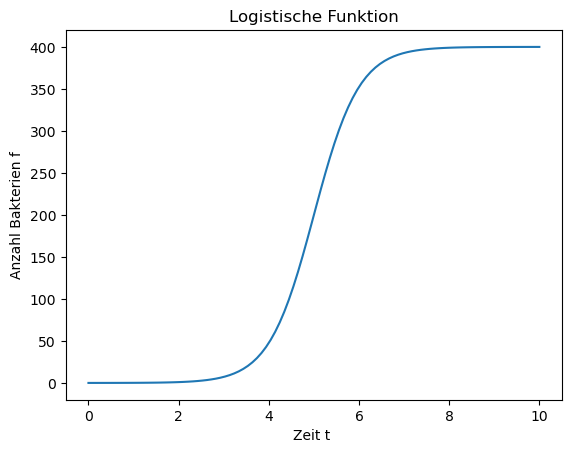

In [1]:
import numpy as np
import matplotlib.pyplot as plt

k = 2
t0 = 5
L = 400
t = np.linspace(0, 10, 100)
f = L / (1 + np.exp(-k * (t - t0)))
plt.plot(t, f)
plt.xlabel('Zeit t ')
plt.ylabel('Anzahl Bakterien f')
plt.title('Logistische Funktion');

## Demo-Datensatz

Wir erzeugen einen Datensatz zum Ausprobieren, indem wir Rauschen auf die gerade geplottete Kurve addieren. Dazu ist die Funktion `np.random.normal(Mittelwert, Std.Abweichung, Länge)` hilfreich. Das erzeugt normalverteilte (= gaußförmige) Zufallswerte mit einem Mittelwert und einer Standardabweichung. `len(f)` liefert die Länge des Datensatzes, die natürlich passen muss.

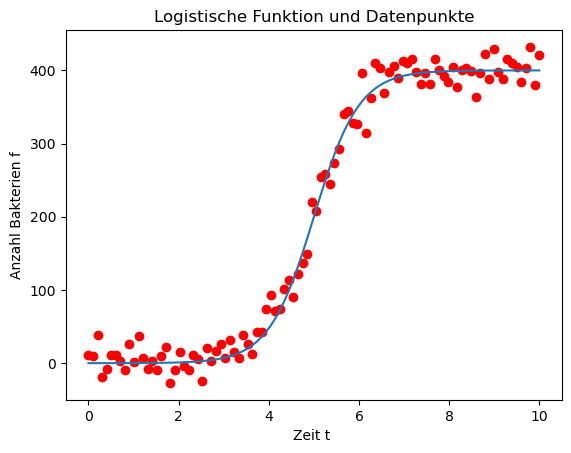

In [2]:
sigma = 20 # Unsicherheit der Messwerte
data = f + np.random.normal(0, sigma, len(f))  # Rauschen hinzufügen

plt.plot(t, f)
plt.scatter(t, data, color='red', label='Datenpunkte')
plt.xlabel('Zeit t ')
plt.ylabel('Anzahl Bakterien f')
plt.title('Logistische Funktion und Datenpunkte');

## scipy.optimize

Zur nichtlinearen Kurvenanpassung verwenden wir die Funktion `curve_fit()` aus der Bibliothek `scipy.optimize`. Da wir nur diese eine Funktion benötigen, importieren wir auch nur diese.

In [3]:
from scipy.optimize import curve_fit

Dann benötigen wir eine Modellfunktion, wobei wir jetzt eine Python-Funktion meinen. Das hatten wir bei den Schiebereglern bereits gesehen.

In [4]:
def logistic(t, L, k, t0):
    y = L / (1 + np.exp(-k * (t - t0)))
    return y


Das Format ist wie folgt: `def` leitet die Definition ein, dann folgt ein frei gewählter Name (solange dieser nicht schon vergeben ist) und anschließend alle Parameter, durch Kommas getrennt, in der Klammer. Der Doppelpunkt schließt die erste Zeile ab. Bei `curve_fit()` wird davon ausgegangen, dass der erste Parameter der unabhängige ist (hier die Zeit) und alle anderen gefunden (optimiert) werden sollen. In den folgenden Zeilen berechnen wir die Funktion und geben mit return den berechneten Wert zurück.

Lassen Sie uns das ausprobiern. Bei $t = t_0$ sollte gerade $L/2$ rasukommen

In [5]:
logistic(5, 500, 677, 5)  # 500/ 2 = 250.0

250.0

Dann rufen wir `curve_fit()` auf

In [6]:
# Anpassen der Funktion logistic an unsere Daten
params, covariance = curve_fit(logistic, t, data, p0=[500,  2, 5])
print('Angepasste Parameter:', params)

Angepasste Parameter: [403.36371355   1.88191823   4.98986695]


Es würde zwar so funktionieren, aber ich möchte das hier ausführlicher schreiben, damit die Bedeutung der Einträge leichter zu verstehen ist.

In [7]:
# Anpassen der Funktion logistic an unsere Daten
params = curve_fit(
    f= logistic,    # Funktion, die angepasst werden soll
    xdata=t,        # Unabhängige Variable (Zeit)
    ydata = data,    # Abhängige Variable (Anzahl Bakterien)
    p0=[300,  1, 4]  # Startwerte für die Parameter (L, k, t0) 
    )
print('Angepasste Parameter:', params)

Angepasste Parameter: (array([403.36375583,   1.88191005,   4.98986559]), array([[ 1.06579457e+01, -1.15472571e-01,  4.21156121e-02],
       [-1.15472571e-01,  7.57995859e-03, -4.56297801e-04],
       [ 4.21156121e-02, -4.56297801e-04,  8.17304884e-04]]))


Um mit der Funktion `curve_fit()` die optimalen Parameter zu ermitteln, muss ihr ein Startvektor `p0` mitgegeben werden.  Dann liefert die Funktion die besten gefundenen Parameter zurück. Wenn die Startwerte jedoch zu weit von den optimalen Werten entfernt sind, wird das Optimum nicht erreicht. Bei der Wahl der Startwerte muss man sich also Mühe geben. 

**Aufgabe** Finden Sie startwerte, die _nicht_ zu einem sinnvollen fit führen.


In [8]:
# Einfluss der Startwerte auf die Anpassung
from ipywidgets import interactive
from ipywidgets import FloatSlider



def logistic_fit(L0, k0, t00):

    params = curve_fit(
        f= logistic,    # Funktion, die angepasst werden soll
        xdata=t,        # Unabhängige Variable (Zeit)
        ydata = data,    # Abhängige Variable (Anzahl Bakterien)
        p0=[L0, k0, t00]  # Startwerte für die Parameter (L, k, t0) 
        )
    
    # Best fit
    y = logistic(t, *params[0])  # params[0] enthält die angepassten Parameter L, k und t0

    # Funktion bei den Startwerten
    ys = logistic(t, L0, k0, t00)
    
    # Plot der Funktionen
    plt.plot(t, ys, label='start', color='red', linestyle='--')
    plt.plot(t, y, label='best fit', color='blue')
    
    # Plot der Datenpunkte
    plt.scatter(t, data, color='red', label='Datenpunkte')
    
    plt.xlabel('Zeit t ')
    plt.ylabel('Anzahl Bakterien f')
    plt.title('Fit: L = {:.0f}, k = {:.2f}, t0 = {:.2f}'.format(*params[0]))
    plt.legend()
    plt.ylim(-100, 500)    


interactive_plot = interactive(logistic_fit,
                               L0=FloatSlider(value=500, min=0, max=1000, step=10, description='L start'),
                               k0=FloatSlider(value=3, min=0, max=10, step=0.1, description='k start'),
                               t00=FloatSlider(value=7, min=0, max=10, step=0.1, description='t0 start'))


interactive_plot


interactive(children=(FloatSlider(value=500.0, description='L start', max=1000.0, step=10.0), FloatSlider(valu…

## Rauschen

Bei der Erzeugung der Punktwolke wurden die Parameter $L = 400$, $k=2$, $t_0 = 5$ festgelegt. Das passt also augenscheinlich ganz gut. Wenn Sie das Notebook noch einmal vollständig ausführen, erhalten Sie neue Zufallszahlen und somit eine neue Punktwolke aus der gleichen Verteilung. Damit können Sie sich die durch das Rauschen bewirkte Variante der FT-Parameter anschauen.

**Aufgabe**  Probieren Sie das aus!

## Unsicherheit der Parameter

Wie wir bereits bei der Anpassung einer Geraden im zweiten Kapitel gesehen haben, lässt sich die Unsicherheit der gefiteten Parameter berechnen. Das funktioniert auch mit der Funktion `curve_fit()`. Dabei gibt es einen zweiten Rückgabewert, den wir oben ignoriert haben: die Kovarianzmatrix. Ohne hier genauer auf deren Bedeutung einzugehen, sei nur gesagt, dass die Wurzel ihrer Diagonalelemente der gesuchten Unsicherheit entspricht.

In [9]:
# Anpassen der Funktion logistic an unsere Daten
params, pcov = curve_fit(
    f= logistic,    # Funktion, die angepasst werden soll
    xdata=t,        # Unabhängige Variable (Zeit)
    ydata = data,    # Abhängige Variable (Anzahl Bakterien)
    p0=[300,  1, 4]  # Startwerte für die Parameter (L, k, t0) 
    )

perr = np.sqrt(np.diag(pcov))

print('Angepasste Parameter:', params)
print('Unsicherheiten der Parameter:', perr)

Angepasste Parameter: [403.36375583   1.88191005   4.98986559]
Unsicherheiten der Parameter: [3.26465094 0.08706296 0.02858854]


## Qualität des Fits

Wie bereits in Kapitel 2 haben wir die Unsicherheit der Messwerte anhand der mittleren Abweichung zwischen Modell und Datenpunkten bestimmt. Dies ist zulässig, setzt jedoch voraus, dass das Modell die Daten tatsächlich beschreibt. Manchmal möchte man genau das überprüfen. In diesem Fall muss eine andere Quelle für die Unsicherheit $\sigma_n$ der einzelnen Messwerte $m_n$ herangezogen werden, um diese Unsicherheit in den Fit einbringen zu können. Dazu wird eine Art normierte quadratische Abweichung definiert:
```math
\chi^2 = \frac{1}{N - M} \sum_{n=1}^N \left( \frac{f(t_n, A, B, ...) - m_n }{\sigma_m} \right)^2
```
Der Abstand zwischen Modell und Daten wird also in Einheiten der Unsicherheit, also in Standardabweichungen, gemessen. Gleichzeitig wurde hier auch die Anzahl $M$ der freien Parameter des Modells $f$ eingeführt. Es ist klar, dass ein Fit umso besser wird, je mehr freie Parameter er hat. Dieser Effekt wird durch $N - M$  herausgenommen.

Nehmen wir als Beispiel an, dass beim Zählen der Bakterien ein Fehler aufgetreten ist und mit der Zeit zusätzlich eine linear ansteigende Zahl fälschlicherweise erkannter Bakterien hinzukommt. Die gemessenen Daten sind dann also 
```math
m_n = f(t_n, A, \dots) + \alpha \, t_n + \text{Rauschen}
````
Zur weiteren Verwendung definiere ich die Funktion `experiment(alpha)`, die solche Daten, parametrisiert mit  $\alpha$ , erzeugt.


In [10]:
def  experiment(alpha):
    return logistic(t, 400, 2, 5) + alpha * t + np.random.normal(0, sigma, len(t)) 

In [11]:
data2 = experiment(30)  # Simulierte Daten mit zusätzlichem linearem Anstieg

Wir tun nun so, als wüssten wir nichts von dem zusätzlichen linearen Anstieg und passen unsere logistische Funktion weiterhin an. Die Unsicherheit $\sigma$ der Messwerte ist uns jedoch bekannt und wird mit `absolute_sigma=True` berücksichtigt.

In [12]:
# Anpassen der Funktion logistic an unsere Daten
params2, pcov2 = curve_fit(
    f= logistic,    # Funktion, die angepasst werden soll
    xdata=t,        # Unabhängige Variable (Zeit)
    ydata = data2,    # Abhängige Variable (Anzahl Bakterien)
    p0=[300,  1, 4],  # Startwerte für die Parameter (L, k, t0) 
    sigma= np.full_like(t, sigma),  # Unsicherheit der Messwerte als Array, alle Werte sind gleich
    absolute_sigma=True  # Unsicherheit der Messwerte ist bekannt
    )

perr2 = np.sqrt(np.diag(pcov2))

print('Angepasste Parameter:', params2)
print('Unsicherheiten der Parameter:', perr2)

Angepasste Parameter: [679.36785637   1.0194121    4.90403026]
Unsicherheiten der Parameter: [4.82851817 0.02615676 0.03072074]


Die gefundenen Best-Fit-Parameter stimmen jetzt nicht mehr mit den 'wahren' Werten $ (400, 2, 5) $ überein. In der Realität fällt das jedoch nicht auf. Auch die Unsicherheiten der Parameter sind ähnlich wie oben und die grafische Darstellung sieht einigermaßen sinnvoll aus.

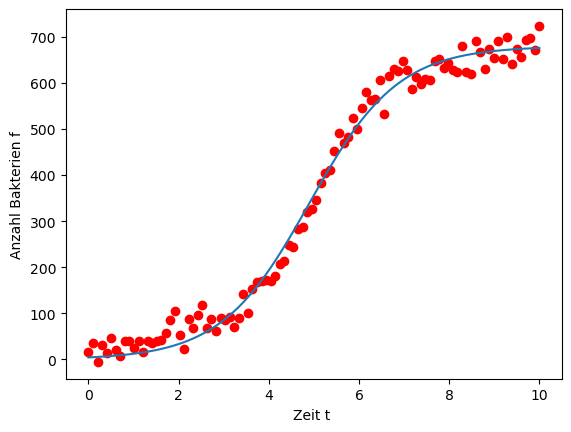

In [13]:
plt.plot(t, logistic(t, *params2), label='Best Fit')
plt.scatter(t, data2, color='red', label='Datenpunkte')
plt.xlabel('Zeit t ')
plt.ylabel('Anzahl Bakterien f');

Allerdings ist ein systematischer Trend der Abweichung zwischen Modell und Daten erkennbar. Das deutet darauf hin, dass in den Daten mehr passiert, als das Modell abbilden kann. Zur besseren Darstellung plotten wir die Abweichung zwischen dem angepassten Modell und den Daten, die sogenannten Residuen.

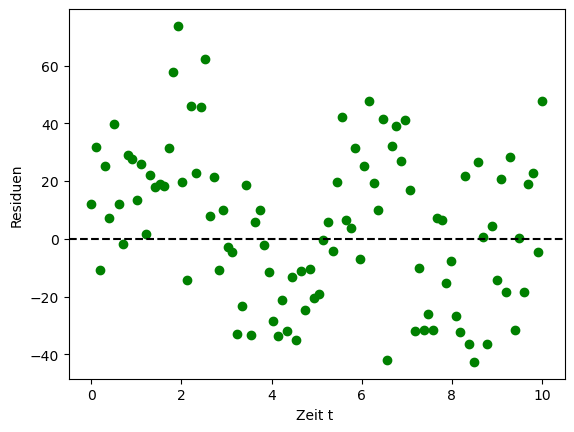

In [14]:
residuals = data2 - logistic(t, *params2)
plt.scatter(t, residuals, color='green', label='Residuen')
plt.axhline(0, color='black', linestyle='--', label='Null-Linie')
plt.xlabel('Zeit t ')
plt.ylabel('Residuen');

Die Residuen sind nicht zufällig um die Null-Linie verteilt!

Dies wird noch deutlicher, wenn wir die mittlere quadratische Abweichung $\chi^2$ betrachten. Im idealen Fall sollte dieser Wert 1 betragen. Werte von $\chi^2$ unter 1 deuten darauf hin, dass die geschätzte Unsicherheit zu groß ist, die Messwerte nicht völlig unabhängig voneinander sind oder das Modell „zu gut“ ist , das heißt, es verfügt über zu viele Freiheitsgrade. Werte, die deutlich größer als 1 sind – beispielsweise größer als 1,5 oder 2 – deuten hingegen darauf hin, dass das Modell die Daten nicht vollständig beschreibt. Der Wert von $\chi^2$ hilft also dabei, zu entscheiden, ob der Fit gelungen ist. Dazu muss in `curve_fit()` allerdings `sigma` gesetzt und `absolute_sigma=True` angegeben werden.


In [15]:
# calculate chisquare
chisq =  np.sum(((data2 - logistic(t, *params2)) / sigma) ** 2)/ (len(data) - len(params2))
chisq

1.8179230563506508

Hier ist der $\chi^2$-Wert also sehr groß. Das folgende Beispiel veranschaulicht die Beziehung zwischen $\chi^2$ und dem zusätzlichen, im Modell nicht berücksichtigten Anstieg $\alpha$ bei simuliertem Rauschen. Die genaue Lage der Punkte verändert sich mit jedem Durchlauf. Der ansteigende Trend bleibt davon unberührt.

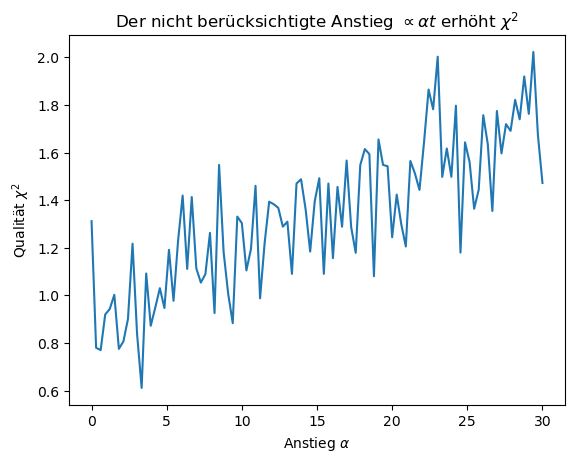

In [16]:
# calculate chisquare for different alpha values
alphas = np.linspace(0,30,100)

chis = []
for alpha in alphas :
    data2 = experiment(alpha)
    params2, pcov2 = curve_fit(
        f= logistic,    # Funktion, die angepasst werden soll
        xdata=t,        # Unabhängige Variable (Zeit)
        ydata = data2,  # Abhängige Variable (Anzahl Bakterien)
        p0=[300,  1, 4],  # Startwerte für die Parameter (L, k, t0) 
        sigma= np.full_like(t, sigma),  # Unsicherheit der Messwerte als Array, alle Werte sind gleich
        absolute_sigma=True  # Unsicherheit der Messwerte ist bekannt
    )
    chisq =  np.sum(((data2 - logistic(t, *params2)) / sigma) ** 2)/ (len(data2) - len(params2))
    chis.append(chisq)

plt.plot(alphas, chis)
plt.xlabel(r'Anstieg $\alpha$')
plt.ylabel(r'Qualität $\chi^2$')
plt.title(r'Der nicht berücksichtigte Anstieg $\propto \alpha t$ erhöht $\chi^2$')
plt.show()